In [1]:
import pandas as pd
dataset = pd.read_csv('FDLdataset.csv')
print(dataset.shape)
dataset = dataset[['concentration_CH4', 'concentration_CO2', 'concentration_H2', 'concentration_H2O', 'concentration_O2', 'temperature_kelvin', 'pressure_bar']]
print(dataset.shape)

(124314, 18)
(124314, 7)


In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test= train_test_split(dataset, test_size=0.19558, random_state=42)

In [3]:
print(x_train.shape)
print(x_test.shape)

(100000, 7)
(24314, 7)


In [4]:
print(x_train)
print(x_test)

        concentration_CH4  concentration_CO2  concentration_H2  \
120696           0.000002             0.0004      8.000000e-08   
60365            0.005000             0.0004      8.000000e-08   
123356           0.010000             0.0004      2.000000e-02   
74913            0.010000             0.0600      8.000000e-08   
54874            0.010000             0.0100      8.000000e-08   
...                   ...                ...               ...   
119879           0.030000             0.0200      3.000000e-02   
103694           0.010000             0.0100      8.000000e-08   
860              0.000002             0.0200      8.000000e-08   
15795            0.010000             0.0004      8.000000e-08   
121958           0.010000             0.0500      8.000000e-08   

        concentration_H2O  concentration_O2  temperature_kelvin  pressure_bar  
120696             0.0123              0.35              287.36        1.0293  
60365              0.0123              0.55    

In [5]:
x_train = np.squeeze(x_train)
x_test = np.squeeze(x_test)
print(x_train.shape)
print(x_test.shape)

NameError: name 'np' is not defined

In [ ]:
print(x_train.describe())

In [ ]:
import matplotlib.pyplot as plt
import glob
import numpy as np

In [ ]:
import tensorflow as tf
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
import keras
from keras import backend as K
from keras.models import Sequential, Model
from keras.metrics import binary_accuracy
from keras.layers import Convolution1D, Dense, MaxPooling1D, Flatten, Input, Lambda, Wrapper, merge, concatenate, Layer
from keras.engine import InputSpec
from keras.layers.core import Dense, Dropout, Activation, Lambda, Flatten

In [6]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

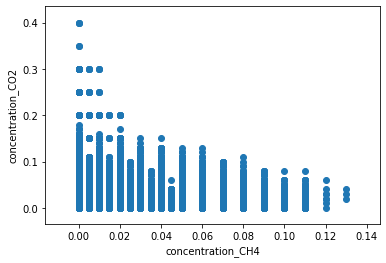

In [51]:
x = x_train['concentration_CH4']
y = x_train['concentration_CO2']

plt.scatter(x,y)
plt.xlabel("concentration_CH4")
plt.ylabel("concentration_CO2")
plt.show()

In [52]:
df = x_train[["concentration_CH4", "concentration_CO2"]]
df = df.as_matrix().astype("float32", copy = False)

/Users/niranjandr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [53]:
stscaler = StandardScaler().fit(df)
df = stscaler.transform(df)

In [54]:
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(df)

In [55]:
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

TypeError: float() argument must be a string or a number, not 'DBSCAN'

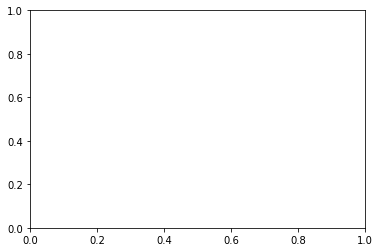

In [56]:
from matplotlib import cm

cmap = cm.get_cmap('Accent')

x_train.plot.scatter(

  x = "concentration_CH4",

  y = "concentration_CO2",

  c = dbsc,

  cmap = cmap,

  colorbar = False

)



In [7]:
import pandas as pd  
import numpy as np 
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import MinMaxScaler  
from sklearn.manifold import TSNE 
import matplotlib.pyplot as plt 
import seaborn as sns 
from keras.layers import Input, Dense 
from keras.models import Model, Sequential 
from keras import regularizers 

In [11]:
input_layer = Input(shape =(x_train.shape[1], )) 
  
# Building the Encoder network 
encoded = Dense(100, activation ='tanh', 
                activity_regularizer = regularizers.l1(10e-5))(input_layer) 
encoded = Dense(50, activation ='tanh', 
                activity_regularizer = regularizers.l1(10e-5))(encoded) 
encoded = Dense(25, activation ='tanh', 
                activity_regularizer = regularizers.l1(10e-5))(encoded) 
encoded = Dense(12, activation ='tanh', 
                activity_regularizer = regularizers.l1(10e-5))(encoded) 
encoded = Dense(6, activation ='relu')(encoded) 
  
# Building the Decoder network 
decoded = Dense(12, activation ='tanh')(encoded) 
decoded = Dense(25, activation ='tanh')(decoded) 
decoded = Dense(50, activation ='tanh')(decoded) 
decoded = Dense(100, activation ='tanh')(decoded) 
  
# Building the Output Layer 
output_layer = Dense(x_train.shape[1], activation ='relu')(decoded) 

# Defining the parameters of the Auto-encoder network 
autoencoder = Model(input_layer, output_layer) 
autoencoder.compile(optimizer ="adadelta", loss ="mse") 

In [13]:

  
# Training the Auto-encoder network 
history = autoencoder.fit(x_train, x_train,  
                batch_size = 128, epochs = 500,  
                shuffle = True, validation_split = 0.20) 

Epoch 1/500
625/625 [==============================] - 2s 2ms/step - loss: 14257.6895 - val_loss: 14249.4912
Epoch 2/500
625/625 [==============================] - 1s 2ms/step - loss: 14090.0879 - val_loss: 13802.3135
Epoch 3/500
625/625 [==============================] - 1s 2ms/step - loss: 13466.5508 - val_loss: 13227.1250
Epoch 4/500
625/625 [==============================] - 1s 2ms/step - loss: 13034.8984 - val_loss: 12884.5361
Epoch 5/500
625/625 [==============================] - 1s 2ms/step - loss: 12724.4443 - val_loss: 12594.8408
Epoch 6/500
625/625 [==============================] - 1s 2ms/step - loss: 12445.5361 - val_loss: 12324.0732
Epoch 7/500
625/625 [==============================] - 1s 2ms/step - loss: 12180.1572 - val_loss: 12062.7207
Epoch 8/500
625/625 [==============================] - 2s 3ms/step - loss: 11922.0439 - val_loss: 11807.8730
Epoch 9/500
625/625 [==============================] - 1s 2ms/step - loss: 11671.4902 - val_loss: 11561.2129
Epoch 10/500
625/62

625/625 [==============================] - 2s 4ms/step - loss: 2569.6917 - val_loss: 2543.3003
Epoch 77/500
625/625 [==============================] - 2s 3ms/step - loss: 2506.2051 - val_loss: 2480.4104
Epoch 78/500
625/625 [==============================] - 1s 2ms/step - loss: 2444.0554 - val_loss: 2418.8457
Epoch 79/500
625/625 [==============================] - 1s 2ms/step - loss: 2383.2166 - val_loss: 2358.5813
Epoch 80/500
625/625 [==============================] - 1s 2ms/step - loss: 2323.6621 - val_loss: 2299.5874
Epoch 81/500
625/625 [==============================] - 2s 2ms/step - loss: 2265.3704 - val_loss: 2241.8479
Epoch 82/500
625/625 [==============================] - 1s 2ms/step - loss: 2208.3203 - val_loss: 2185.3347
Epoch 83/500
625/625 [==============================] - 1s 2ms/step - loss: 2152.4849 - val_loss: 2130.0288
Epoch 84/500
625/625 [==============================] - 1s 2ms/step - loss: 2097.8413 - val_loss: 2075.9028
Epoch 85/500
625/625 [===================

625/625 [==============================] - 1s 2ms/step - loss: 253.9227 - val_loss: 250.4250
Epoch 153/500
625/625 [==============================] - 1s 2ms/step - loss: 244.2594 - val_loss: 240.8725
Epoch 154/500
625/625 [==============================] - 1s 2ms/step - loss: 234.8913 - val_loss: 231.6129
Epoch 155/500
625/625 [==============================] - 1s 2ms/step - loss: 225.8112 - val_loss: 222.6372
Epoch 156/500
625/625 [==============================] - 2s 3ms/step - loss: 217.0123 - val_loss: 213.9403
Epoch 157/500
625/625 [==============================] - 1s 2ms/step - loss: 208.4889 - val_loss: 205.5161
Epoch 158/500
625/625 [==============================] - 1s 2ms/step - loss: 200.2345 - val_loss: 197.3577
Epoch 159/500
625/625 [==============================] - 2s 3ms/step - loss: 192.2420 - val_loss: 189.4597
Epoch 160/500
625/625 [==============================] - 2s 3ms/step - loss: 184.5065 - val_loss: 181.8160
Epoch 161/500
625/625 [============================

625/625 [==============================] - 2s 3ms/step - loss: 13.4577 - val_loss: 13.0410
Epoch 230/500
625/625 [==============================] - 1s 2ms/step - loss: 13.3658 - val_loss: 12.9482
Epoch 231/500
625/625 [==============================] - 2s 3ms/step - loss: 13.2842 - val_loss: 12.8659
Epoch 232/500
625/625 [==============================] - 2s 3ms/step - loss: 13.2111 - val_loss: 12.7903
Epoch 233/500
625/625 [==============================] - 2s 3ms/step - loss: 13.1450 - val_loss: 12.7228
Epoch 234/500
625/625 [==============================] - 2s 3ms/step - loss: 13.0863 - val_loss: 12.6629
Epoch 235/500
625/625 [==============================] - 2s 2ms/step - loss: 13.0349 - val_loss: 12.6099
Epoch 236/500
625/625 [==============================] - 2s 3ms/step - loss: 12.9885 - val_loss: 12.5613
Epoch 237/500
625/625 [==============================] - 2s 3ms/step - loss: 12.9472 - val_loss: 12.5184
Epoch 238/500
625/625 [==============================] - 2s 2ms/step 

625/625 [==============================] - 1s 2ms/step - loss: 12.6258 - val_loss: 12.1495
Epoch 308/500
625/625 [==============================] - 1s 2ms/step - loss: 12.6258 - val_loss: 12.1495
Epoch 309/500
625/625 [==============================] - 1s 2ms/step - loss: 12.6258 - val_loss: 12.1495
Epoch 310/500
625/625 [==============================] - 1s 2ms/step - loss: 12.6258 - val_loss: 12.1494
Epoch 311/500
625/625 [==============================] - 2s 3ms/step - loss: 12.6258 - val_loss: 12.1494
Epoch 312/500
625/625 [==============================] - 1s 2ms/step - loss: 12.6258 - val_loss: 12.1494
Epoch 313/500
625/625 [==============================] - 1s 2ms/step - loss: 12.6258 - val_loss: 12.1494
Epoch 314/500
625/625 [==============================] - 1s 2ms/step - loss: 12.6258 - val_loss: 12.1493
Epoch 315/500
625/625 [==============================] - 1s 2ms/step - loss: 12.6258 - val_loss: 12.1493
Epoch 316/500
625/625 [==============================] - 1s 2ms/step 

625/625 [==============================] - 1s 2ms/step - loss: 12.6251 - val_loss: 12.1486
Epoch 386/500
625/625 [==============================] - 1s 2ms/step - loss: 12.6251 - val_loss: 12.1486
Epoch 387/500
625/625 [==============================] - 1s 2ms/step - loss: 12.6251 - val_loss: 12.1486
Epoch 388/500
625/625 [==============================] - 1s 2ms/step - loss: 12.6251 - val_loss: 12.1486
Epoch 389/500
625/625 [==============================] - 1s 2ms/step - loss: 12.6251 - val_loss: 12.1486
Epoch 390/500
625/625 [==============================] - 1s 2ms/step - loss: 12.6251 - val_loss: 12.1486
Epoch 391/500
625/625 [==============================] - 1s 2ms/step - loss: 12.6251 - val_loss: 12.1485
Epoch 392/500
625/625 [==============================] - 1s 2ms/step - loss: 12.6251 - val_loss: 12.1485
Epoch 393/500
625/625 [==============================] - 1s 2ms/step - loss: 12.6251 - val_loss: 12.1485
Epoch 394/500
625/625 [==============================] - 1s 2ms/step 

625/625 [==============================] - 1s 2ms/step - loss: 12.6248 - val_loss: 12.1482
Epoch 464/500
625/625 [==============================] - 1s 2ms/step - loss: 12.6248 - val_loss: 12.1482
Epoch 465/500
625/625 [==============================] - 1s 2ms/step - loss: 12.6248 - val_loss: 12.1482
Epoch 466/500
625/625 [==============================] - 1s 2ms/step - loss: 12.6248 - val_loss: 12.1482
Epoch 467/500
625/625 [==============================] - 1s 2ms/step - loss: 12.6248 - val_loss: 12.1482
Epoch 468/500
625/625 [==============================] - 1s 2ms/step - loss: 12.6248 - val_loss: 12.1482
Epoch 469/500
625/625 [==============================] - 1s 2ms/step - loss: 12.6248 - val_loss: 12.1482
Epoch 470/500
625/625 [==============================] - 1s 2ms/step - loss: 12.6247 - val_loss: 12.1482
Epoch 471/500
625/625 [==============================] - 1s 2ms/step - loss: 12.6247 - val_loss: 12.1482
Epoch 472/500
625/625 [==============================] - 1s 2ms/step 

In [14]:
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 7)]               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               800       
_________________________________________________________________
dense_11 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_12 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_13 (Dense)             (None, 12)                312       
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_15 (Dense)             (None, 12)               

760/760 [==============================] - 1s 1ms/step - loss: 12.5007


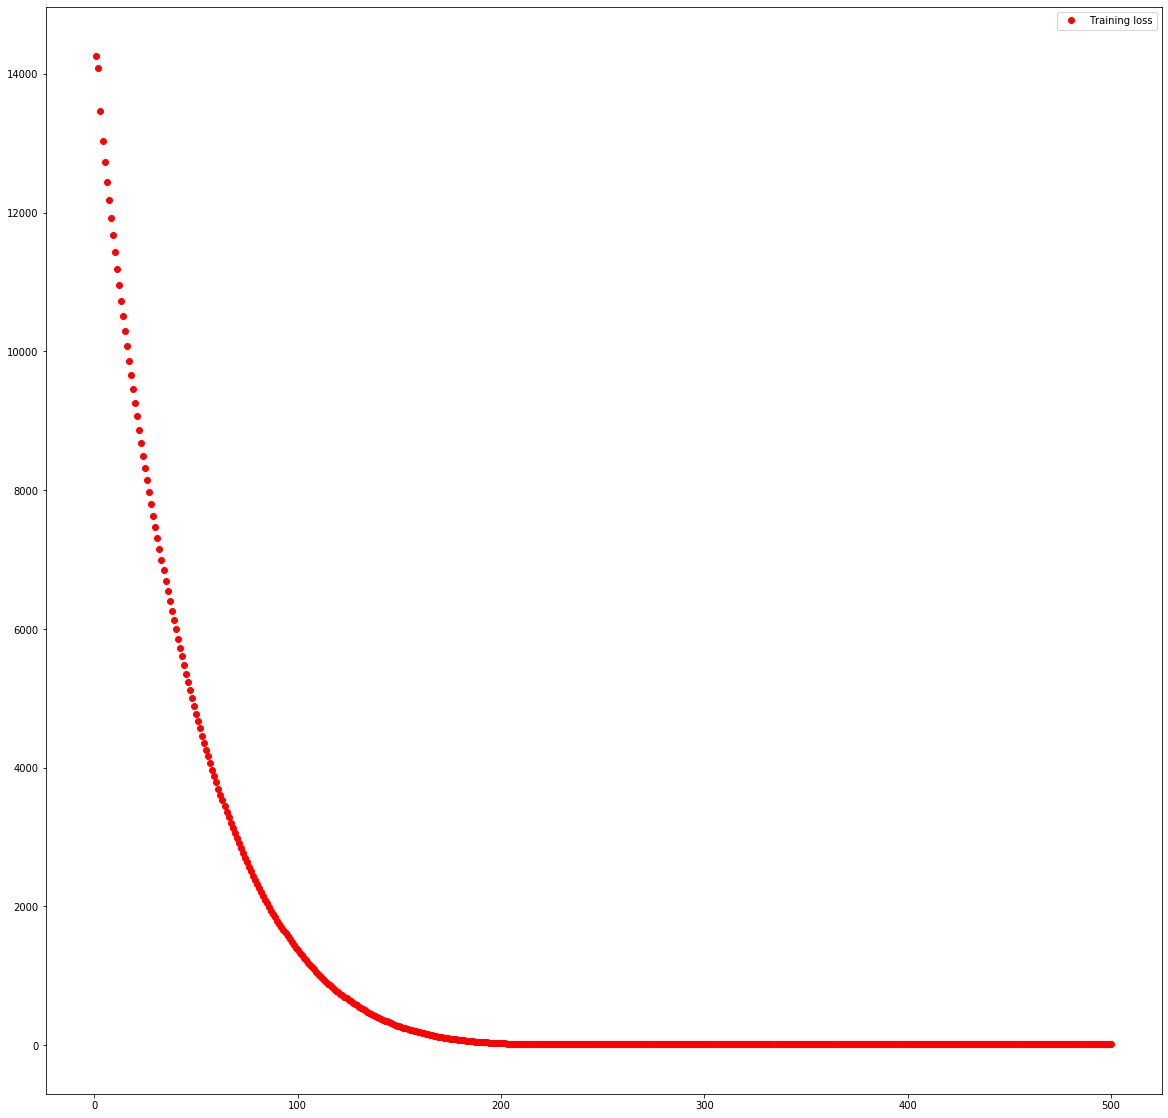

In [15]:
test_loss = autoencoder.evaluate(x_test, x_test)
loss = history.history['loss']
epochs = range(1, len(loss)+1)
plt.figure(figsize=(20,20))
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.savefig('LossCurveAutoencoder.png')
plt.legend()
plt.show()

In [77]:
from keras.utils import plot_model
plot_model(autoencoder, to_file='autoencoder.png', show_shapes=True)
from IPython.display import Image
Image(filename='autoencoder.png')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


FileNotFoundError: [Errno 2] No such file or directory: 'autoencoder.png'

In [16]:
predicted = autoencoder.predict(x_test)

In [78]:
predicted.shape
print(predicted)

[[1.5907658e-02 0.0000000e+00 0.0000000e+00 ... 2.1236923e-01
  3.1611700e+02 0.0000000e+00]
 [1.5907628e-02 0.0000000e+00 0.0000000e+00 ... 2.1236914e-01
  3.1611703e+02 0.0000000e+00]
 [1.5907599e-02 0.0000000e+00 0.0000000e+00 ... 2.1236943e-01
  3.1611700e+02 0.0000000e+00]
 ...
 [1.5907569e-02 0.0000000e+00 0.0000000e+00 ... 2.1236944e-01
  3.1611700e+02 0.0000000e+00]
 [1.5907688e-02 0.0000000e+00 0.0000000e+00 ... 2.1236920e-01
  3.1611697e+02 0.0000000e+00]
 [1.5907807e-02 0.0000000e+00 0.0000000e+00 ... 2.1236914e-01
  3.1611700e+02 0.0000000e+00]]


In [19]:
from scipy import spatial
x_test = x_test.to_numpy()
pred_flat = predicted.flatten()
test_flat = x_test.flatten()

In [20]:
result = spatial.distance.cosine(pred_flat,test_flat)
result

0.0004368765860576218

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# intialize pca and logistic regression model
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='auto', solver='liblinear')

# fit and transform data
x_test_pca = pca.fit_transform(x_test)
x_pred_pca = pca.transform(predicted)
# lr.fit(x_train_pca, x_pred_pca)

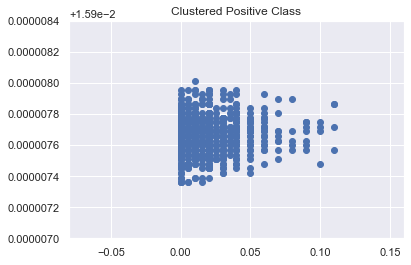

In [125]:
yyy = [-2,2]
plt.title('Clustered Positive Class')
# plt.ylabel('Predictions')
# plt.xlabel('True')
plt.scatter(x_test[:1000 , 0], predicted[:1000, 0])
# plt.plot(yyy,yyy,'r')

plt.ylim(0.0159070, 0.0159084)
plt.xlim(-0.08, 0.16)
plt.savefig('Clustered_Positive_Class2.png')
plt.show()



In [88]:
from scipy.cluster import hierarchy
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import DBSCAN

cluster_assignments = DBSCAN(eps=0.3, min_samples=100, metric = 'minkowski', p = 2).fit_predict(x_pred_pca)



(0.03395, 0.03415)

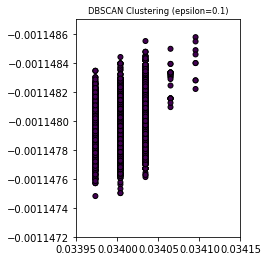

In [56]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1);plt.title("DBSCAN Clustering (epsilon=0.1)", fontsize='small')
plt.scatter(x_pred_pca[:, 0], x_pred_pca[:, 1], marker='o', c=cluster_assignments,s=25, edgecolor='k')
plt.ylim(-0.0011472, -0.0011487)
plt.xlim(0.03395, 0.03415)

In [142]:
inputmodel = Sequential()
inputmodel.add(Input(shape =(x_train.shape[1], )) )

# model.compile(optimizer = None, loss= None)

inputmodel.compile(optimizer ="adadelta", loss ="mse") 

inputmodel.fit(x_train)
x_train_new = inputmodel.output

Train on 100000 samples
100000/100000 [==============================] - 3s 25us/sample - loss: 14201.2661


In [143]:
def encoder(input_data):
#     input_layer = Input(shape =(x_train.shape[1], )) 
  
    # Building the Encoder network 
    encoded1 = Dense(100, activation ='tanh', 
                activity_regularizer = regularizers.l1(10e-5))(input_data) 
    encoded2 = Dense(50, activation ='tanh', 
                activity_regularizer = regularizers.l1(10e-5))(encoded1) 
    encoded3 = Dense(25, activation ='tanh', 
                activity_regularizer = regularizers.l1(10e-5))(encoded2) 
    encoded4 = Dense(12, activation ='tanh', 
                activity_regularizer = regularizers.l1(10e-5))(encoded3) 
    encoded5 = Dense(6, activation ='relu')(encoded4) 
    
    return (encoded5)
  
#     #encoder
#     #input = 28 x 28 x 1 (wide and thin)
#     conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
#     conv1 = BatchNormalization()(conv1)
#     conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
#     conv1 = BatchNormalization()(conv1)
#     pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
#     conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
#     conv2 = BatchNormalization()(conv2)
#     conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
#     conv2 = BatchNormalization()(conv2)
#     pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
#     conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)
#     conv3 = BatchNormalization()(conv3)
#     conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
#     conv3 = BatchNormalization()(conv3)
#     conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 256 (small and thick)
#     conv4 = BatchNormalization()(conv4)
#     conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
#     conv4 = BatchNormalization()(conv4)
    

In [144]:
x_train2 = x_train_new

In [152]:
def fc(enco):
    flat = Flatten()(enco)
    den = Dense(128, activation='relu')(flat)
    out = Dense(1, activation='sigmoid')(den)
    return out

In [153]:
from keras.models import Model
tf.compat.v1.disable_eager_execution()
encode = encoder(x_train2)
full_model = Model(x_train2,fc(encode))

In [155]:
full_model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [156]:
full_model.summary()

Model: "functional_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 7)]               0         
_________________________________________________________________
dense_157 (Dense)            (None, 100)               800       
_________________________________________________________________
dense_158 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_159 (Dense)            (None, 25)                1275      
_________________________________________________________________
dense_160 (Dense)            (None, 12)                312       
_________________________________________________________________
dense_161 (Dense)            (None, 6)                 78        
_________________________________________________________________
flatten_14 (Flatten)         (None, 6)               

In [158]:
classify_train = full_model.fit(x_train, batch_size=64,epochs=100,verbose=1)

Train on 100000 samples
Epoch 1/100
100000/100000 [==============================] - 3s 27us/sample - loss: 0.0085 - accuracy: 1.0000
Epoch 2/100
100000/100000 [==============================] - 3s 27us/sample - loss: 0.0085 - accuracy: 1.0000
Epoch 3/100
100000/100000 [==============================] - 3s 32us/sample - loss: 0.0085 - accuracy: 1.0000
Epoch 4/100
100000/100000 [==============================] - 3s 29us/sample - loss: 0.0085 - accuracy: 1.0000
Epoch 5/100
100000/100000 [==============================] - 3s 27us/sample - loss: 0.0085 - accuracy: 1.0000
Epoch 6/100
 37120/100000 [==========>...................] - ETA: 1s - loss: 0.0085 - accuracy: 1.0000

KeyboardInterrupt: 